In [1]:
import os
os.chdir("/Users/ulrikah/fag/thesis/rave")


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

from rave.sound import Sound
from rave.effect import Effect
from rave.analyser import Analyser
from rave.constants import KSMPS, SAMPLE_RATE
from rave.tools import sec_per_k, timestamp

**Analysis**

Files to analyse (in `results/reward_func_design`):

```
inv.wav
rel_gain.wav
ratio_350.wav
```


**Retrieving the features**

In [32]:
feature_extractors = ["rms", "pitch", "spectral"]
analyser = Analyser(feature_extractors)
base_dir = "/Users/ulrikah/fag/thesis/results/reward_func_design"

inv = os.path.join(base_dir, "inv.wav")
rel = os.path.join(base_dir, "rel_gain.wav")
ratio = os.path.join(base_dir, "ratio_800ish.wav")
mixed = os.path.join(base_dir, "mixed_1000.wav")

target     = "/Users/ulrikah/fag/thesis/rave/rave/input_audio/amen_5s.wav"
source     = "/Users/ulrikah/fag/thesis/rave/rave/input_audio/noise_5s.wav"

inv_sound = Sound(inv)
rel_sound = Sound(rel)
ratio_sound = Sound(ratio)
mixed_sound = Sound(mixed)

target_sound = Sound(target)
source_sound = Sound(source)

sounds = [inv_sound, rel_sound, ratio_sound, mixed_sound, target_sound, source_sound]
for sound in sounds:
    sound.prepare_to_render(analyser=analyser)
    sound.features = []

done = False

while not done:
    for sound in sounds:
        done = done or sound.render()
        channel_values = sound.player.get_channels(analyser.analysis_features)
        sound.features.append(channel_values)
print("Number of feature vectors", [len(s.features) for s in sounds])
print("(sr / ksmps) * duration", (SAMPLE_RATE / KSMPS) * sounds[0].duration)

Number of feature vectors [1724, 1724, 1724, 1724, 1724, 1724]
(sr / ksmps) * duration 1722.9999999999998


## Visualisation

In [23]:
def clean_csound_name(csound_var):
    """
    e.g. 
    kcentroid_l -> centroid
    aenv -> env
    """
    return csound_var[1:].split("_")[0]

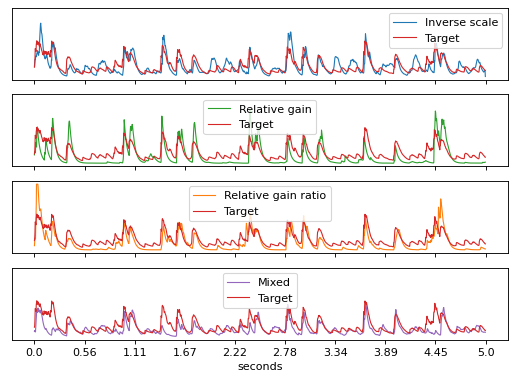

<Figure size 960x800 with 0 Axes>

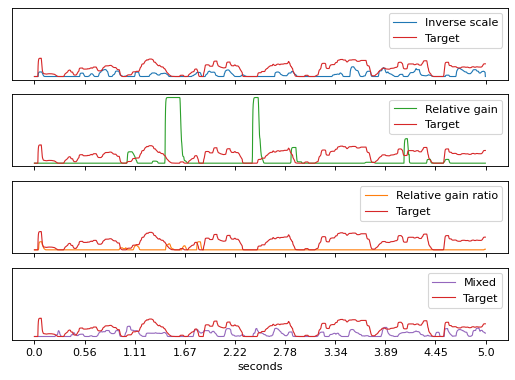

<Figure size 960x800 with 0 Axes>

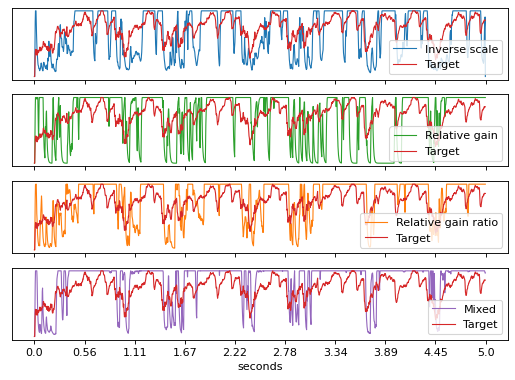

<Figure size 960x800 with 0 Axes>

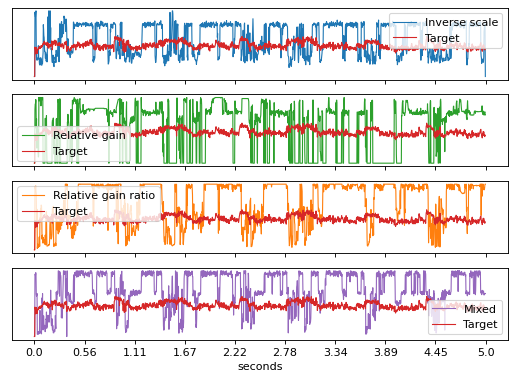

<Figure size 960x800 with 0 Axes>

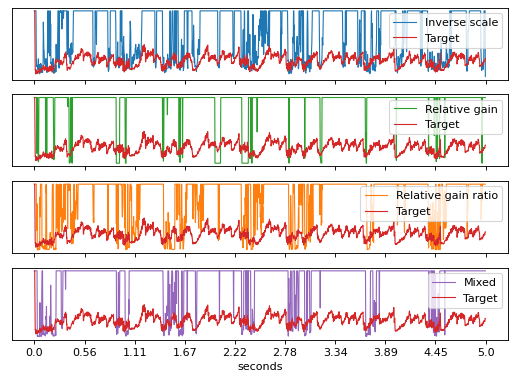

<Figure size 960x800 with 0 Axes>

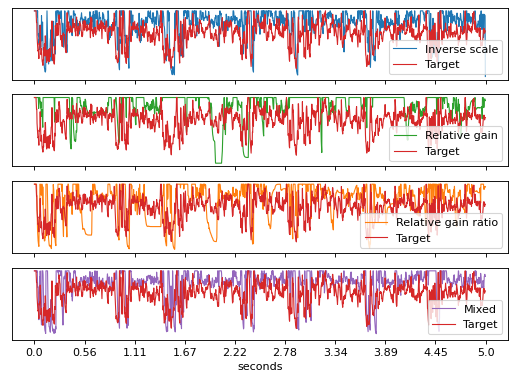

<Figure size 960x800 with 0 Axes>

In [35]:
# numpyify
for sound in sounds:
    sound.features = np.array(sound.features)

sound_names = ["Inverse scale", "Relative gain", "Relative gain ratio", "Mixed", "Target", "Source"]

sound_colors = [
    "tab:blue",
    "tab:green",
    "tab:orange",
    "tab:purple",
    "tab:red",
    "tab:cyan",
]

assert len(sound_colors) == len(sound_names)

n_frames = len(sounds[0].features)
n_xticks = 10
xtick_values = np.linspace(0, n_frames, num=n_xticks)
xtick_labels = [str(round(tick, 2)) for tick in xtick_values * sec_per_k(KSMPS, SAMPLE_RATE)]


inv_index = 0
rel_index = 1
ratio_index = 2
mixed_index = 3

target_index = 4
source_index = 5

feature_names = [clean_csound_name(f) for f in analyser.analysis_features]


t = timestamp()

for i, feature_name in enumerate(feature_names):

    fig, axs = plt.subplots(4, figsize=(8,5.5), dpi=80, sharex=True, sharey=True)
    #fig.suptitle(feature_name)
    plt.xticks(xtick_values, xtick_labels)
    plt.xlabel("seconds")
    plt.yticks([])

    # get values for current feature
    inv_feature = sounds[inv_index].features[:n_frames,i]
    rel_feature = sounds[rel_index].features[:n_frames,i]
    ratio_feature = sounds[ratio_index].features[:n_frames,i]
    mixed_feature = sounds[mixed_index].features[:n_frames,i]

    target_feature = sounds[target_index].features[:n_frames,i]
    source_feature = sounds[source_index].features[:n_frames,i]

    fig = plt.figure(figsize=(12,10), dpi=80)
    fig.suptitle(feature_name, x=0.5, y=.98, size="xx-large", weight="bold", va="center", ha="center")
    fig.subplots_adjust(top=0.95)
    
    axs[0].plot(inv_feature, c=sound_colors[inv_index], label=f"{sound_names[inv_index]}", linewidth=1, markersize=12)
    axs[0].plot(target_feature, c=sound_colors[target_index], label=f"{sound_names[target_index]}", linewidth=1, markersize=12)
    axs[0].legend()

    axs[1].plot(rel_feature, c=sound_colors[rel_index], label=f"{sound_names[rel_index]}", linewidth=1, markersize=12)
    axs[1].plot(target_feature, c=sound_colors[target_index], label=f"{sound_names[target_index]}", linewidth=1, markersize=12)
    axs[1].legend()

    axs[2].plot(ratio_feature, c=sound_colors[ratio_index], label=f"{sound_names[ratio_index]}", linewidth=1, markersize=12)
    axs[2].plot(target_feature, c=sound_colors[target_index], label=f"{sound_names[target_index]}", linewidth=1, markersize=12)
    axs[2].legend()

    axs[3].plot(mixed_feature, c=sound_colors[mixed_index], label=f"{sound_names[mixed_index]}", linewidth=1, markersize=12)
    axs[3].plot(target_feature, c=sound_colors[target_index], label=f"{sound_names[target_index]}", linewidth=1, markersize=12)
    axs[3].legend()

    #plt.savefig(f"rave/plots/reward_function_{feature_name}_{t}.png", transparent=True, dpi=200)
    plt.show()